Milestone 1

Nama    : Azhar Muhammad

Batch   : RMT-042

Notebook ini dibuat untuk loading dan analisa data. Data ini berisi Customer Churn dari perusahaan telecom, analisis ini bertujuan untuk mengetahui 'monthly charge' rata-rata pelanggan kami yang menjadi customer, siapa saja pelanggan yang churn berdasarkan umur, serta berapa lama mereka bertahan sebelum churn. Selain itu, kami juga ingin mengetahui daerah dengan tingkat churn tertinggi, alasan utama pelanggan churn, dan bagaimana korelasi antara churn dengan alasan 'kompetitor' serta tempat tinggal pelanggan.

In [ ]:
# Load Data CSV

import pandas as pd

df = pd.read_csv(r'E:\FTDS\p0-ftds042-rmt-m1-azharmuhammad-3124\telecom_customer_churn.csv')

df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


1. Siapa saja yang Churn berdasarkan generasi

In [ ]:
# Membuat kategori berdasarkan generasi
def categorize_generation_by_age(age):
    if 61 <= age <= 79:
        return "Baby Boomers"
    elif 45 <= age <= 60:
        return "Generation X"
    elif 29 <= age <= 44:
        return "Millennials"
    elif 13 <= age <= 28:
        return "Generation Z"
    else:
        return "Other"

df['Generation'] = df['Age'].apply(categorize_generation_by_age)

C:\Users\Azhar Muhammad\AppData\Local\Temp\ipykernel_23640\2062198674.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generation_counts.index, y=generation_counts.values, palette='rocket')


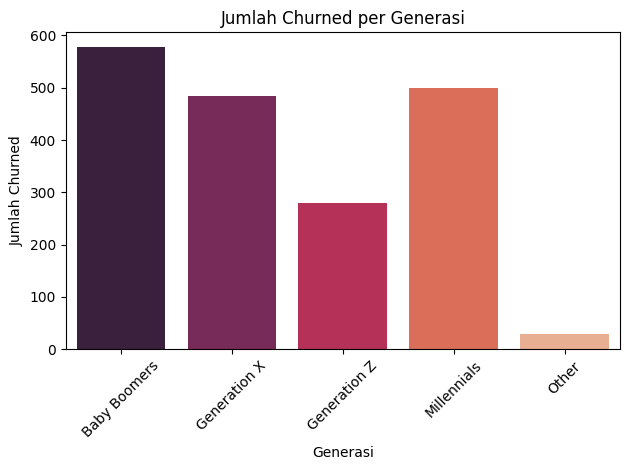

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengambil yang churned dari customer status
churned_df = df[df['Customer Status'] == 'Churned']

# Hitung jumlah churned per generasi
generation_counts = churned_df['Generation'].value_counts().sort_index()

# Visualisai sebagai output
sns.barplot(x=generation_counts.index, y=generation_counts.values, palette='rocket')
plt.title('Jumlah Churned per Generasi')
plt.xlabel('Generasi')
plt.ylabel('Jumlah Churned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight 

Baby boomers menjadi customer yang paling banyak churn, GenX dan Millennials hampir sama dengan jumlah yang mirip, dan GenZ
memiliki jumlah customer churn yang paling sedikit.

2. Setelah berapa lama mereka menjadi customer sebelum churn

C:\Users\Azhar Muhammad\AppData\Local\Temp\ipykernel_23640\3488129747.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Status', y='Duration as Customer', data=df, ci=None)


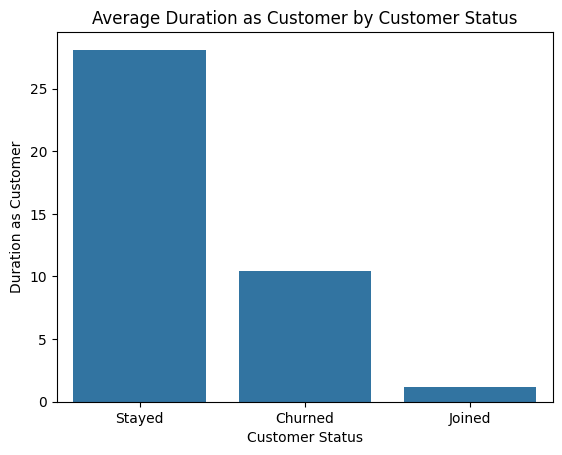

In [ ]:
# Mengambil durasi customer perbulan sebelum churn
df['Duration as Customer'] = df['Total Charges'] / df['Monthly Charge']

# Visualisasi sebagai output
sns.barplot(x='Customer Status', y='Duration as Customer', data=df, ci=None)
plt.title('Average Duration as Customer by Customer Status')
plt.show()

Insight

Dari tabel ini bisa dilihat bahwa customer yang sudah berlanggan lebih dari 10 bulan akan terus berlangganan, sedangkan customer yang baru berlangganan selama di bawah 10 bulan lebih cenderung untuk churn.

3. Daerah yang paling banyak customer churn

In [6]:
# Mengkategorikan berdasarkan zipcode
def assign_ca_region(zipcode):
    zip_int = int(str(zipcode).zfill(5))

    if 90000 <= zip_int <= 93599:
        if zip_int <= 93000:
            return "Southern California"
        elif 93001 <= zip_int <= 93499:
            return "Central California"
        elif 93500 <= zip_int <= 93599:
            return "Eastern California"
    elif 93600 <= zip_int <= 93999:
        return "Central California"
    elif 94000 <= zip_int <= 96162:
        if 93900 <= zip_int <= 95999:
            return "Western California"
        else:
            return "Northern California"
    else:
        return "Outside California"

    
# Membuat column baru
df['Region'] = df['Zip Code'].apply(assign_ca_region)
# Mengambil hanya yang churned
df_churned = df[df['Customer Status'] == 'Churned']

# Membuat dataframe baru untuk di masukkan ke visualisasi
region_churn = df_churned['Region'].value_counts().reset_index()
region_churn.columns = ['Region', 'Churn Count']


C:\Users\Azhar Muhammad\AppData\Local\Temp\ipykernel_23640\1620470734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_churn, x='Region', y='Churn Count', palette='Reds')


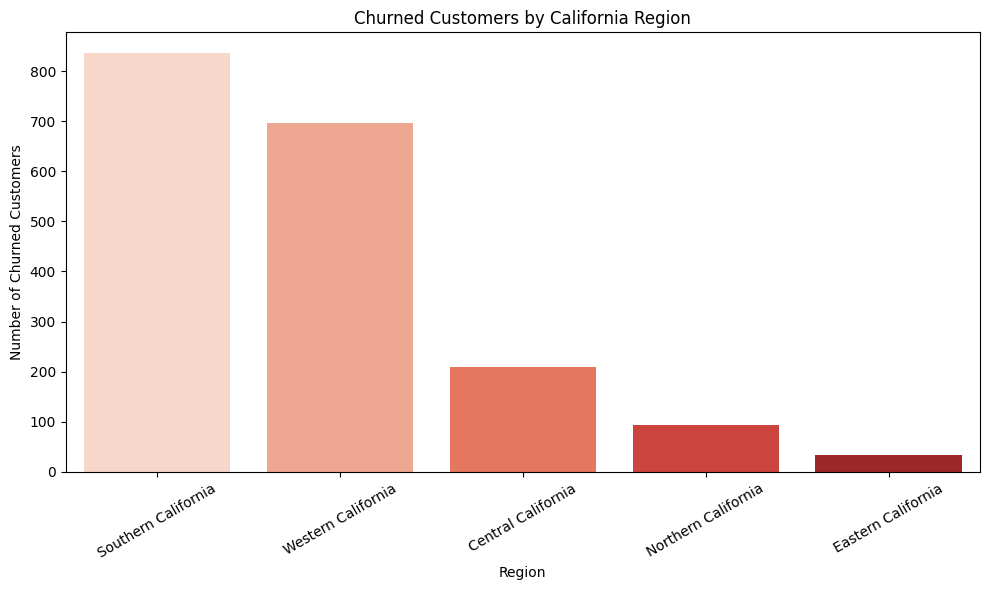

In [7]:
# Visualisasi sebagai output
plt.figure(figsize=(10, 6))
sns.barplot(data=region_churn, x='Region', y='Churn Count', palette='Reds')
plt.title("Churned Customers by California Region")
plt.ylabel("Number of Churned Customers")
plt.xlabel("Region")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Insight

Southern California memiliki jumlah customer yang churn yang jauh lebih banyak di bandingkan Eastern California

4. Rata-rata alasan churn

C:\Users\Azhar Muhammad\AppData\Local\Temp\ipykernel_23640\3949691898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn Category', palette='Set2')


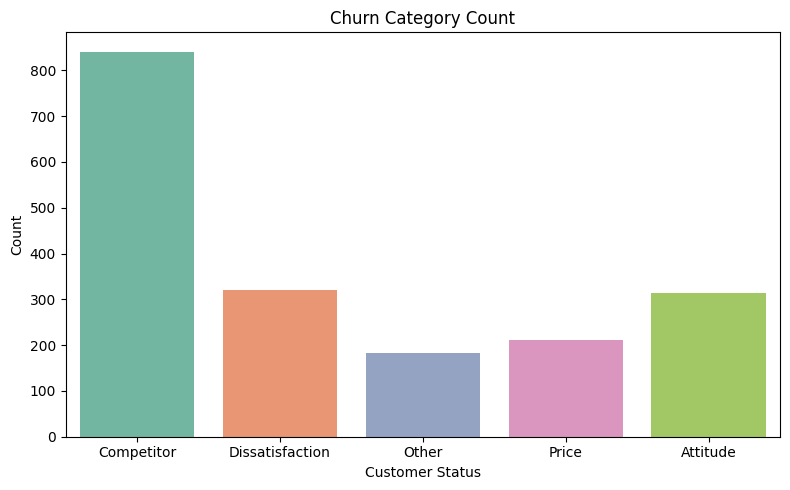

In [ ]:
# Membuat visualisai untuk jumlah alasan churn
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Churn Category', palette='Set2')
plt.title("Churn Category Count")
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insight

Competitor menjadi alasan paling banyak customer churn dan dissatisfaction jauh kedua, dari dua poin kita bisa mengambil kesimpulan bahwa kompetitor kita memiliki produk yang jauh lebih baik.

5. Bagaimana korelasi antara customer yang churn dengan alasan 'Competitor' dan daerah (Region)

In [9]:
from scipy.stats import chi2_contingency

df_churned = df[df['Customer Status'] == 'Churned']

# Buat tabel kontingensi: Region vs Alasan Churn
contingency_table = pd.crosstab(df_churned['Region'], df_churned['Churn Reason'])

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output hasil
print("Chi-Square Value:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)


Chi-Square Value: 263.48348704958477
Degrees of Freedom: 76
P-Value: 1.651057597005979e-22


Insight

Chi-Square Value: Nilai yang besar menunjukkan variabel yang diuji tidak independen dan memiliki hubungan yang signifikan antara keduanya.

Degrees of Freedom: Dihitung berdasarkan jumlah kategori dalam data dan digunakan untuk menentukan distribusi Chi-Square yang tepat untuk analisis ini.

P-Value: Nilai yang sangat kecil (0.0000000000000000000000165) jauh di batas umum (0.05), dengan nilai tersebut kita bisa menganggapnya nol yang berarti memilki nilai signifikan antara dua variable, seperti yang sudah kita analisis dari chi-square value.

In [10]:
# Lihat distribusi alasan churn per region
churn_distribution = df[df['Customer Status'] == 'Churned'].groupby('Region')['Churn Category'].value_counts()

print(churn_distribution)

Region               Churn Category 
Central California   Competitor          71
                     Attitude            62
                     Dissatisfaction     31
                     Price               23
                     Other               22
Eastern California   Competitor          23
                     Attitude             8
                     Other                2
                     Dissatisfaction      1
Northern California  Competitor          34
                     Dissatisfaction     21
                     Price               16
                     Attitude            12
                     Other               11
Southern California  Competitor         401
                     Attitude           146
                     Dissatisfaction    126
                     Price               82
                     Other               81
Western California   Competitor         312
                     Dissatisfaction    142
                     Price             

Insight

Dari output ini kita bisa melihat hubungan anatara alasan 'Competitor' dan daerah, Western dan Southern California memiliki jumlah 'Competitor' sebagai alasan yang sangat besar. Dan seperti yang kita lihat juga di poin 3 bahwa Western dan Southern California menjadi tempat paling banyak customer churn dari perusahaan ini.

6. Statistika deskriptif untuk 'Monthly Charge'

In [11]:
# 1. Central Tendecies
mean = df['Monthly Charge'].mean()
median = df['Monthly Charge'].median()
mode = df['Monthly Charge'].mode().values

# 2. Measure of Variance
std_dev = df['Monthly Charge'].std()
variance = df['Monthly Charge'].var()
range_val = df['Monthly Charge'].max() - df['Monthly Charge'].min()

# 3. Outlier Analysis
Q1 = df['Monthly Charge'].quantile(0.25)
Q3 = df['Monthly Charge'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Monthly Charge'] < lower_bound) | (df['Monthly Charge'] > upper_bound)]

In [12]:
# Output perhitungan statistika deskriptif
print("=== Central Tendencies ===")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")

print("=== Measure of Variance ===")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_val}")

print("=== Outlier Analysis ===")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers:{outliers}")

=== Central Tendencies ===
Mean: 63.59613091012353
Median: 70.05
Mode: [20.05]
=== Measure of Variance ===
Standard Deviation: 31.204743115579422
Variance: 973.7359929093014
Range: 128.75
=== Outlier Analysis ===
Q1: 30.4
Q3: 89.75
IQR: 59.35
Lower Bound: -58.62500000000001
Upper Bound: 178.775
Outliers:Empty DataFrame
Columns: [Customer ID, Gender, Age, Married, Number of Dependents, City, Zip Code, Latitude, Longitude, Number of Referrals, Tenure in Months, Offer, Phone Service, Avg Monthly Long Distance Charges, Multiple Lines, Internet Service, Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data, Contract, Paperless Billing, Payment Method, Monthly Charge, Total Charges, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Total Revenue, Customer Status, Churn Category, Churn Reason, Generation, Duration as Customer, Region]
Index: []

[

Insight

Mayoritas pelanggan memiliki durasi berlangganan antara 30 hingga 90 bulan dengan penyebaran yang luas, mencakup pelanggan yang berhenti lebih cepat sekitar 20 bulan dan yang bertahan sangat lama hingga lebih dari 150 bulan, tanpa adanya outlier, sehingga variasi ini merupakan bagian alami dari pola data yang condong ke kiri.

KESIMPULAN AKHIR

Dari hasil analisis, terlihat bahwa mayoritas pelanggan yang churn berasal dari generasi Baby Boomers, sementara Gen Z memiliki tingkat churn terendah, menunjukkan adanya perbedaan perilaku antar generasi dalam loyalitas terhadap layanan. Pelanggan yang bertahan lebih dari 10 bulan cenderung tetap berlangganan, menandakan masa awal langganan sebagai fase paling rentan terhadap churn. Wilayah Southern dan Western California mencatat churn tertinggi, dengan Southern California secara khusus menunjukkan tingkat churn yang jauh lebih tinggi dibanding wilayah lain seperti Eastern California. Alasan utama pelanggan churn adalah beralih ke kompetitor, yang mengindikasikan bahwa pesaing mungkin menawarkan produk atau layanan yang lebih menarik. Hasil uji Chi-Square menunjukkan adanya hubungan yang signifikan secara statistik antara alasan churn dan wilayah, memperkuat temuan bahwa churn karena kompetitor lebih dominan di wilayah tertentu. Kombinasi dari temuan-temuan ini menyoroti pentingnya strategi retensi pelanggan yang ditargetkan berdasarkan demografi, durasi langganan, dan lokasi geografis, serta perlunya inovasi layanan untuk menyaingi daya tarik kompetitor di wilayah kunci.